In [2]:
#importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
#reading the dataset to a dataframe
df = pd.read_csv('day.csv')

In [4]:
#there are no null values present. Hence ,no need to drop or replace any
print(df.shape)
print(df.info())

(730, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


# Data Visualization

Univariant Analysis

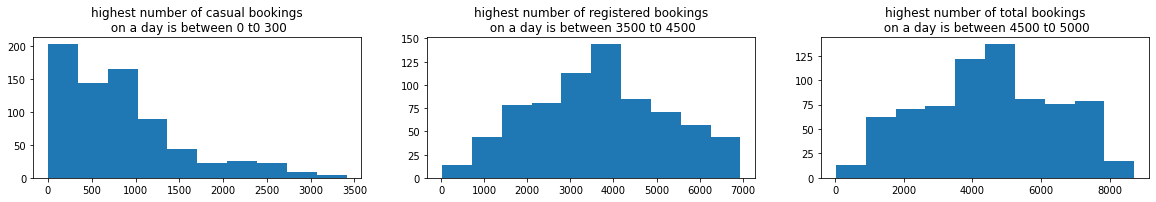

In [5]:
#analyzing the number of casual and registered bookings
fig = plt.figure(figsize = (20,15))
sp = fig.add_subplot(5,3,1)
sp.hist(df['casual'])
sp.set_title('highest number of casual bookings\n on a day is between 0 t0 300')

sp= fig.add_subplot(5,3,2)
sp.hist(df['registered'])
sp.set_title('highest number of registered bookings\n on a day is between 3500 t0 4500')

sp= fig.add_subplot(5,3,3)
sp.hist(df['cnt'])
sp.set_title('highest number of total bookings\n on a day is between 4500 t0 5000')
plt.show()

Multivaraint Analisys

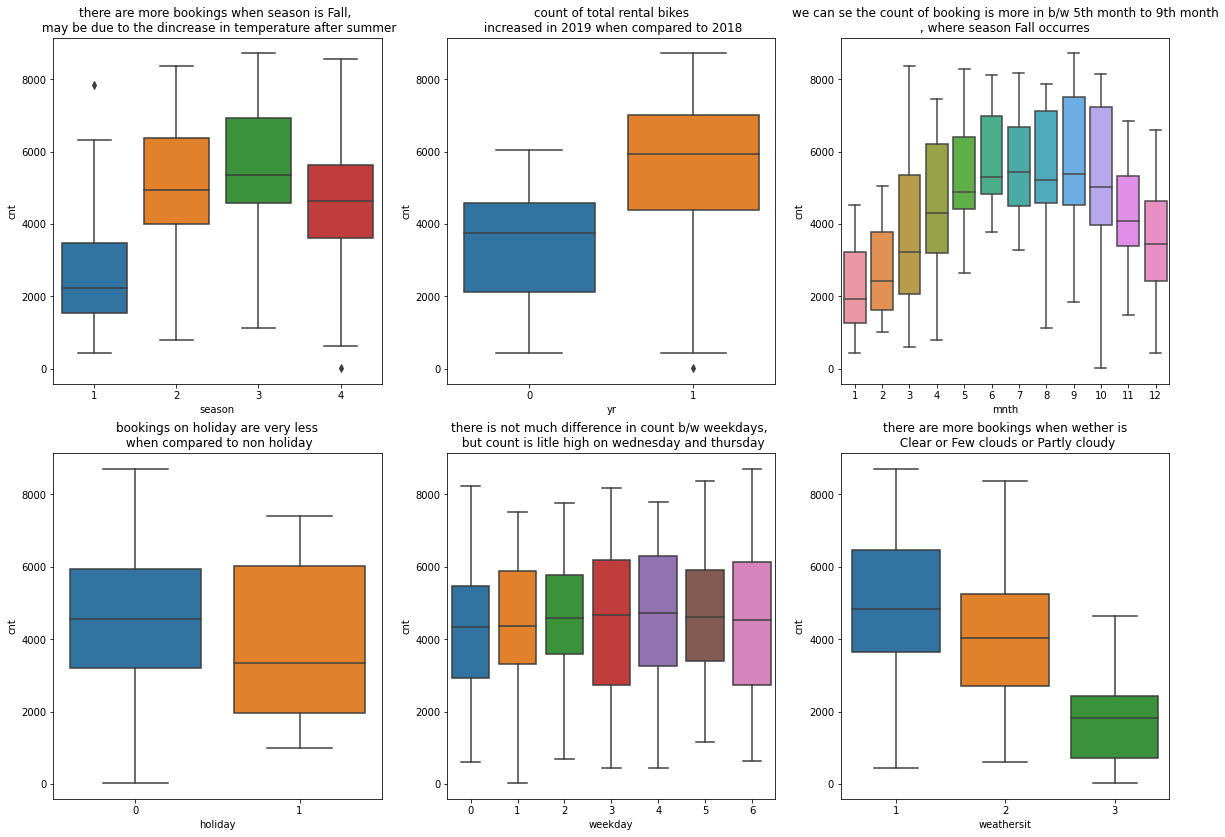

In [6]:
#Analysing the relation between the catagorical variables witht the target varaible
#creating subplots to generate all the boxplots at once
fig = plt.figure(figsize = (20,14))
ax = fig.add_subplot(2,3,1)
ax.set_title('there are more bookings when season is Fall, \n may be due to the dincrease in temperature after summer')
sn.boxplot(x='season', y='cnt',  data= df)

ax = fig.add_subplot(2,3,2)
ax.set_title('count of total rental bikes\n increased in 2019 when compared to 2018')
sn.boxplot(x='yr', y='cnt',  data= df)

ax = fig.add_subplot(2,3,3)
ax.set_title('we can se the count of booking is more in b/w 5th month to 9th month\n, where season Fall occurres')
sn.boxplot(x='mnth', y='cnt',  data= df)

ax = fig.add_subplot(2,3,4)
ax.set_title('bookings on holiday are very less\n when compared to non holiday')
sn.boxplot(x='holiday', y='cnt',  data= df)

ax = fig.add_subplot(2,3,5)
ax.set_title('there is not much difference in count b/w weekdays, \n but count is litle high on wednesday and thursday')
sn.boxplot(x='weekday', y='cnt',  data= df)

ax = fig.add_subplot(2,3,6)
ax.set_title('there are more bookings when wether is\n Clear or Few clouds or Partly cloudy')
sn.boxplot(x='weathersit', y='cnt',  data= df)

plt.show()

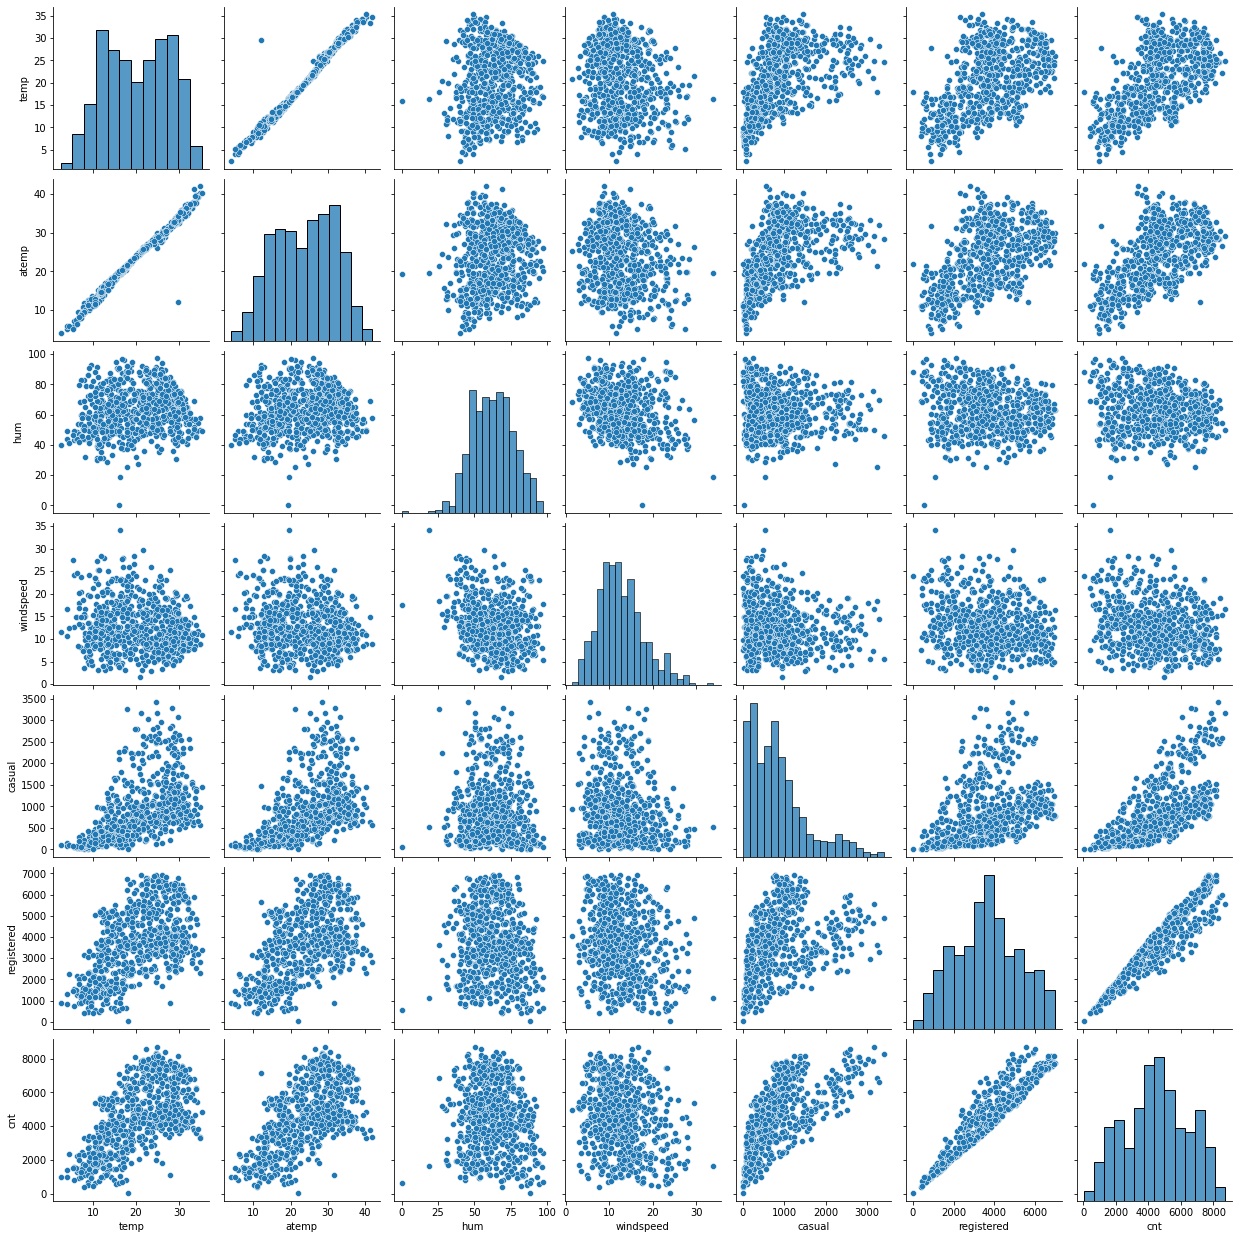

In [7]:
#pair plot for non catagorical variables
num_var = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
sn.pairplot(df[num_var])
plt.show()

Encoding the Variable

In [8]:
#addig dummy variables and droping redundand variable
df = pd.get_dummies(df, columns = ['weekday', 'mnth', 'weathersit', 'season'], drop_first = True)

In [9]:
#dropping unwanted colums, since they will have no effect in prediction
df = df.drop(['dteday','yr', 'instant'], axis = 1)
#df.head()

Splitting the data and Rescaling

<AxesSubplot:>

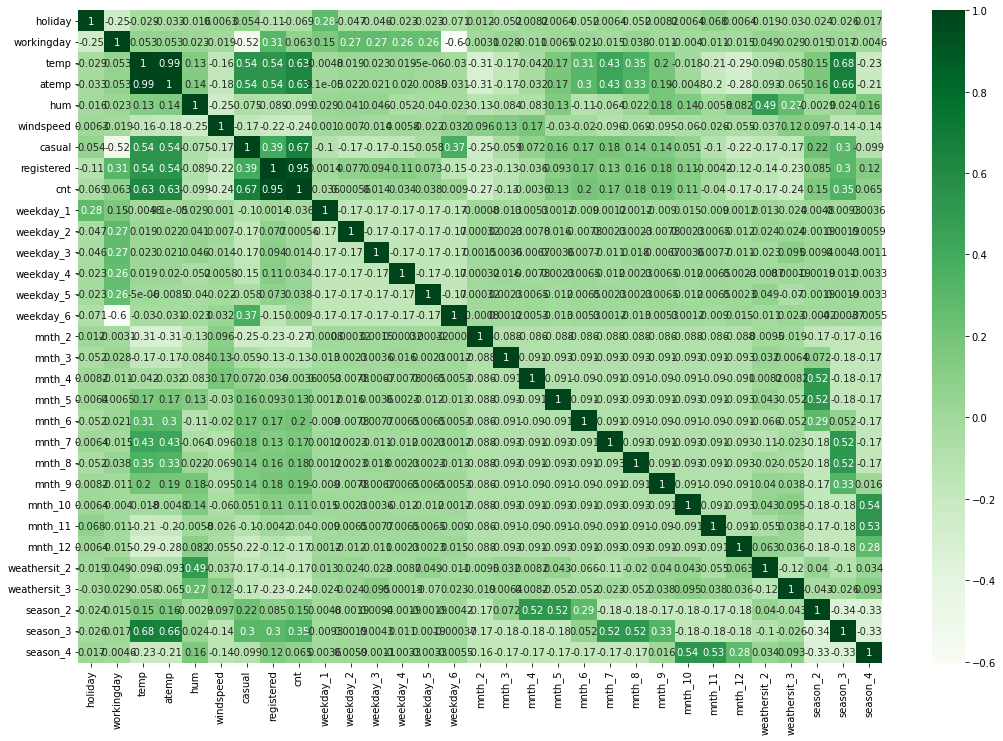

In [10]:
#heatmap to check the corelation between variable
plt.figure(figsize = (18,12))
sn.heatmap(df.corr(), annot = True, cmap = "Greens")

In [11]:
#splitting the data set into two dataframes
df_train, df_test = train_test_split(df, train_size=0.7, random_state = 100)

In [12]:
#creating X_train
X_train = df_train.drop('cnt', axis = 1)
#removing value since it has high pvalue and high VIF
X_train = X_train.drop(['registered','casual', 'temp', 'season_3', 'workingday'], axis = 1)
y_train = df_train.pop('cnt')

#uilding the model for train data
X_train_sm = sm.add_constant(X_train)
lr  = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     27.86
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           1.20e-77
Time:                        22:23:44   Log-Likelihood:                -4359.5
No. Observations:                 510   AIC:                             8771.
Df Residuals:                     484   BIC:                             8881.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2418.0755    464.091      5.210      0.000    1506.194    3329.957
holiday       -899.8308    384.454     -2.341      0.020   -1655.236    -144.425
atemp          142.3025     16.792      8.475      0.000     109.309     175.296
hum            -24.7305      5.699     -4.340      0.000     -35.928     -13.533
windspeed      -48.6728     11.920     -4.083      0.000     -72.094     -25.252
weekday_1      423.1648    215.991      1.959      0.051      -1.231     847.561
weekday_2      280.5508    218.013      1.287      0.199    -147.818     708.920
weekday_3      417.0757    209.041      1.995      0.047       6.335     827.816
weekday_4      351.1827    219.130      1.603      0.110     -79.381     781.746
weekday_5      448.3828    220.861      2.030      0.043      14.418     882.347
weekday_6      366.7121    210.023      1.746      0.081     -45.957     779.381
mnth_2         109.9775    297.951      0.369      0.712    -475.459     695.414
mnth_3         365.2024    315.106      1.159      0.247    -253.942     984.347
mnth_4         490.7849    451.492      1.087      0.278    -396.342    1377.912
mnth_5         401.2580    484.566      0.828      0.408    -550.855    1353.371
mnth_6         272.0252    483.458      0.563      0.574    -677.910    1221.961
mnth_7          15.3674    475.979      0.032      0.974    -919.874     950.608
mnth_8         762.4041    429.362      1.776      0.076     -81.239    1606.047
mnth_9        1163.5130    400.469      2.905      0.004     376.640    1950.386
mnth_10        173.6830    464.437      0.374      0.709    -738.879    1086.245
mnth_11        -98.7154    438.489     -0.225      0.822    -960.292     762.862
mnth_12       -102.0256    361.772     -0.282      0.778    -812.863     608.811
weathersit_2  -372.2684    150.309     -2.477      0.014    -667.607     -76.930
weathersit_3 -2180.9269    381.678     -5.714      0.000   -2930.877   -1430.977
season_2       607.6859    285.618      2.128      0.034      46.481    1168.891
season_4      1395.6369    322.902      4.322      0.000     761.174    2030.099
==============================================================================
Omnibus:                       11.880   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.059
Skew:                           0.103   Prob(JB):                       0.0293
Kurtosis:                       2.462   Cond. No.                     1.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
#scalingthe 
Scaler = MinMaxScaler()
num_var = ['temp', 'hum','windspeed', 'casual', 'registered', 'atemp' ]
#--fit
df_train[num_var] = Scaler.fit_transform(df_train[num_var])

In [14]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,66.95
25,season_4,6.03
2,atemp,5.73
14,mnth_5,5.64
19,mnth_10,5.18
15,mnth_6,5.13
17,mnth_8,4.98
16,mnth_7,4.97
24,season_2,4.72
20,mnth_11,4.71


C:\Users\6113422\.env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

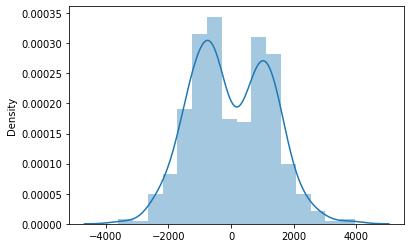

In [15]:
#predicting the depedent y
y_train_pred = lr_model.predict(X_train_sm)
#analysing the reseduals
res =  y_train - y_train_pred
sn.distplot(res)

In [16]:
#tranforming the X_test using the X_train fit
df_test[num_var] = Scaler.transform(df_test[num_var])
#X_test = df_test.drop(['cnt', 'temp','registered','casual','holiday', 'workingday','season_3'] , axis = 1)
X_test = df_test.drop(['cnt','registered','casual', 'temp', 'season_3', 'workingday'], axis = 1)
y_test = df_test.pop('cnt')

In [17]:
#predicting the test data
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm)

In [18]:
r2_score(y_true = y_test, y_pred = y_test_pred)

-0.16030560122682957